<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.719183,39.175324,40.461265,187.355773,2233.475933,-2046.120161
1,0.0,1.0,53.467880,42.478189,-1684.021139,-1578.075070,-2066.919358,488.844287
2,0.0,2.0,75.537285,73.216941,-325.746965,-166.992739,777.754681,-944.747420
3,0.0,3.0,72.676530,72.150190,-4487.579259,-4332.752538,472.073133,-4804.825672
4,0.0,4.0,40.961767,34.042427,1132.871594,1217.875788,-3484.770587,4702.646375
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,87.635383,50.317118,-3812.970989,-3665.018488,1622.974067,-5287.992555
19996,999.0,16.0,40.885136,62.223000,730.614132,843.722268,320.734914,522.987354
19997,999.0,17.0,80.362489,91.246625,-3637.571764,-3455.962650,3461.059281,-6917.021931
19998,999.0,18.0,45.875907,44.486716,-822.547826,-722.185203,-400.086640,-322.098563


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    97.719183  39.175324    40.461265   187.355773  2233.475933   
      1.0    53.467880  42.478189 -1684.021139 -1578.075070 -2066.919358   
      2.0    75.537285  73.216941  -325.746965  -166.992739   777.754681   
      3.0    72.676530  72.150190 -4487.579259 -4332.752538   472.073133   
      4.0    40.961767  34.042427  1132.871594  1217.875788 -3484.770587   
...                ...        ...          ...          ...          ...   
999.0 15.0   87.635383  50.317118 -3812.970989 -3665.018488  1622.974067   
      16.0   40.885136  62.223000   730.614132   843.722268   320.734914   
      17.0   80.362489  91.246625 -3637.571764 -3455.962650  3461.059281   
      18.0   45.875907  44.486716  -822.547826  -722.185203  -400.086640   
      19.0   61.294738  66.178970 -4331.590247 -4194.116538  1367.267543   

                   e_hat  
rep   index               
0.0   0.0   -2046.120161  
      1.0     488.844287  
      2.0    -944.747420  
      3.0   -4804.825672  
      4.0    4702.646375  
...                  ...  
999.0 15.0  -5287.992555  
      16.0    522.987354  
      17.0  -6917.021931  
      18.0   -322.098563  
      19.0  -5561.384081  

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    97.719183  39.175324    40.461265   187.355773  2233.475933   
      1.0    53.467880  42.478189 -1684.021139 -1578.075070 -2066.919358   
      2.0    75.537285  73.216941  -325.746965  -166.992739   777.754681   
      3.0    72.676530  72.150190 -4487.579259 -4332.752538   472.073133   
      4.0    40.961767  34.042427  1132.871594  1217.875788 -3484.770587   
...                ...        ...          ...          ...          ...   
999.0 15.0   87.635383  50.317118 -3812.970989 -3665.018488  1622.974067   
      16.0   40.885136  62.223000   730.614132   843.722268   320.734914   
      17.0   80.362489  91.246625 -3637.571764 -3455.962650  3461.059281   
      18.0   45.875907  44.486716  -822.547826  -722.185203  -400.086640   
      19.0   61.294738  66.178970 -4331.590247 -4194.116538  1367.267543   

                   e_hat  
rep   index               
0.0   0.0   -2046.120161  
      1.0     488.844287  
      2.0    -944.747420  
      3.0   -4804.825672  
      4.0    4702.646375  
...                  ...  
999.0 15.0  -5287.992555  
      16.0    522.987354  
      17.0  -6917.021931  
      18.0   -322.098563  
      19.0  -5561.384081  

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,97.719183,39.175324,40.461265,187.355773,2233.475933,-2046.120161
1,0.0,1.0,53.467880,42.478189,-1684.021139,-1578.075070,-2066.919358,488.844287
2,0.0,2.0,75.537285,73.216941,-325.746965,-166.992739,777.754681,-944.747420
3,0.0,3.0,72.676530,72.150190,-4487.579259,-4332.752538,472.073133,-4804.825672
4,0.0,4.0,40.961767,34.042427,1132.871594,1217.875788,-3484.770587,4702.646375
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,87.635383,50.317118,-3812.970989,-3665.018488,1622.974067,-5287.992555
19996,999.0,16.0,40.885136,62.223000,730.614132,843.722268,320.734914,522.987354
19997,999.0,17.0,80.362489,91.246625,-3637.571764,-3455.962650,3461.059281,-6917.021931
19998,999.0,18.0,45.875907,44.486716,-822.547826,-722.185203,-400.086640,-322.098563


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    97.719183  39.175324    40.461265   187.355773  2233.475933   
      1.0    53.467880  42.478189 -1684.021139 -1578.075070 -2066.919358   
      2.0    75.537285  73.216941  -325.746965  -166.992739   777.754681   
      3.0    72.676530  72.150190 -4487.579259 -4332.752538   472.073133   
      4.0    40.961767  34.042427  1132.871594  1217.875788 -3484.770587   
...                ...        ...          ...          ...          ...   
999.0 15.0   87.635383  50.317118 -3812.970989 -3665.018488  1622.974067   
      16.0   40.885136  62.223000   730.614132   843.722268   320.734914   
      17.0   80.362489  91.246625 -3637.571764 -3455.962650  3461.059281   
      18.0   45.875907  44.486716  -822.547826  -722.185203  -400.086640   
      19.0   61.294738  66.178970 -4331.590247 -4194.116538  1367.267543   

                   e_hat  
rep   index               
0.0   0.0   -2046.120161  
      1.0     488.844287  
      2.0    -944.747420  
      3.0   -4804.825672  
      4.0    4702.646375  
...                  ...  
999.0 15.0  -5287.992555  
      16.0    522.987354  
      17.0  -6917.021931  
      18.0   -322.098563  
      19.0  -5561.384081  

[20000 rows x 6 columns]

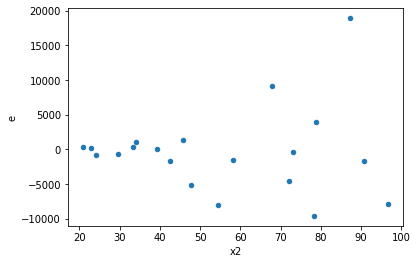

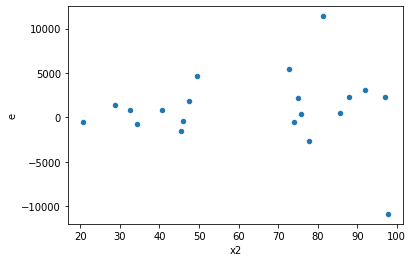

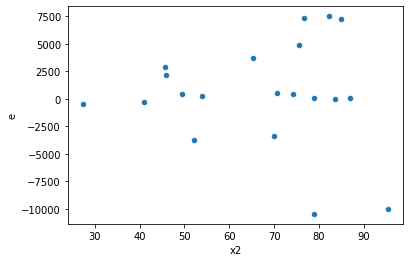

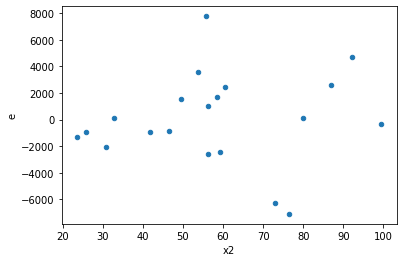

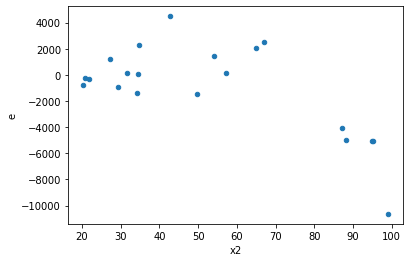

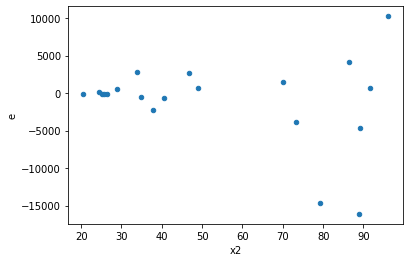

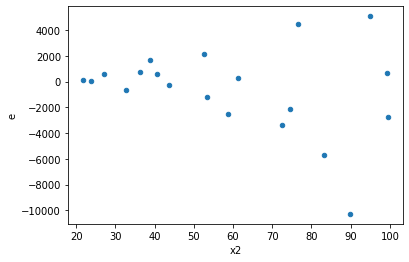

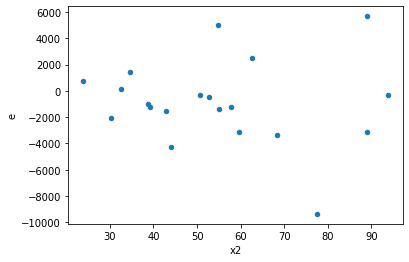

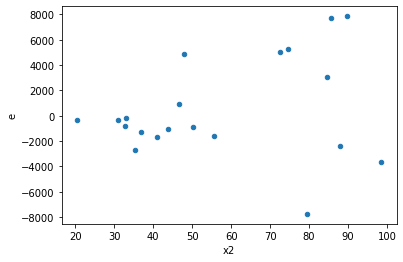

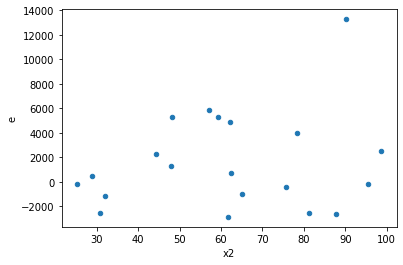

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,12.0,4.0,63789125.27229027,498009816.3240224,5315760.439357522,124502454.0810056,23.421381663326674,0.00789125687351433,0.9960543715632428,0.003945628436757165,Reject005=0 : Heteroscedasticity
7.0,5.0,11.0,9113125.060581818,182636460.57375306,1822625.0121163637,16603314.597613914,9.109561477121819,0.002471570405034651,0.9987642147974827,0.0012357852025173255,Reject005=0 : Heteroscedasticity
10.0,12.0,4.0,40839448.750420466,459572499.48030734,3403287.395868372,114893124.87007684,33.759454170564126,0.003886018129935831,0.9980569909350321,0.0019430090649679155,Reject005=0 : Heteroscedasticity
11.0,8.0,8.0,17763839.182297163,284581956.2851444,2220479.8977871453,35572744.53564305,16.020295689726186,0.0007221661642584642,0.9996389169178708,0.0003610830821292321,Reject005=0 : Heteroscedasticity
12.0,5.0,11.0,2278623.519798797,106930877.16648372,455724.70395975944,9720988.8333167,21.3308358069065,5.084689616285942e-05,0.9999745765519186,2.542344808142971e-05,Reject005=0 : Heteroscedasticity
13.0,12.0,4.0,300897992.89599615,266479771.4542882,25074832.74133301,66619942.86357205,2.656844954892028,0.35765747432540707,0.8211712628372965,0.17882873716270353,Reject005=1 : Homoscedasticity
15.0,9.0,7.0,42884336.48261384,75002851.32804254,4764926.275845982,10714693.046863219,2.2486587255667234,0.2980077851278917,0.8509961074360541,0.14900389256394586,Reject005=1 : Homoscedasticity
16.0,10.0,6.0,51143601.60165909,190589898.4714289,5114360.160165909,31764983.078571483,6.210939801615582,0.03648089033693469,0.9817595548315327,0.018240445168467345,Reject005=0 : Heteroscedasticity
24.0,7.0,9.0,8830391.895658594,87447905.65876529,1261484.5565226562,9716433.962085031,7.702380430933578,0.00673006835114176,0.9966349658244291,0.00336503417557088,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,6.0,376497442.54241765,22398590.000094272,37649744.254241765,3733098.3333490454,0.0991533516971622,0.0018745808249766688,Reject005=0 : Heteroscedasticity
1.0,9.0,7.0,128753447.24447004,65862696.30407332,14305938.582718894,9408956.614867616,0.6576958624884164,0.5466134747158636,Reject005=1 : Homoscedasticity
2.0,7.0,9.0,199907311.9385452,176910791.47544402,28558187.41979217,19656754.60838267,0.6883053997593562,0.636544966017118,Reject005=1 : Homoscedasticity
3.0,8.0,8.0,93464850.42248282,30191755.188814364,11683106.302810352,3773969.3986017955,0.32302790891271554,0.13058204229505288,Reject005=1 : Homoscedasticity
4.0,11.0,5.0,29928298.352859616,13591450.99297633,2720754.3957145107,2718290.198595266,0.9990942963748854,0.9218728733894436,Reject005=1 : Homoscedasticity
5.0,12.0,4.0,63789125.27229027,498009816.3240224,5315760.439357522,124502454.0810056,23.421381663326674,0.00789125687351433,Reject005=0 : Heteroscedasticity
6.0,7.0,9.0,184036525.12903845,8879614.03171873,26290932.161291208,986623.7813020812,0.03752715100587844,0.0002647227647407418,Reject005=0 : Heteroscedasticity
7.0,5.0,11.0,9113125.060581818,182636460.57375306,1822625.0121163637,16603314.597613914,9.109561477121819,0.002471570405034651,Reject005=0 : Heteroscedasticity
8.0,8.0,8.0,103385418.14212802,89087157.95953624,12923177.267766003,11135894.74494203,0.8616994500816798,0.8383904452620085,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    540
Reject005=1 : Homoscedasticity      460
Name: Result_test, dtype: int64